The torque of gravity on the arm is of the form $k\cos\theta$. This is therefore counteracted by a feedfoward term of $f\cos\theta$. The integral term is used to compensate for error in the approximation of the feedforward term.

Utility functions and imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)

In [2]:
def clamp(value, low, high):
    return max(low, min(value, high))

Solution settings and PID parameters:

In [3]:
# Timesteps and number of steps
nt=300
dt=0.05
# PID params
p=0.1
i=0.01
d=0
# Better to overshoot feedforward here
f=0.3 #Ideally equal to armweight but simulating imperfectness
minout=-0.7
maxout=1
mininteg=-0.15/i
maxinteg=0.15/i
motorpower=100
armweight=0.2 # Elevator weight in terms of motor power-subtracted from output

In [4]:
# Initialize variables
timerange=np.arange(0,nt*dt,dt)
setpointarray=np.full((nt),90)
setpointarray[nt//2:]=0
out=np.full((nt),-90)
pidoutraw=np.zeros(nt)
pidout=np.zeros(nt)
porpout=np.zeros(nt)
integout=np.zeros(nt)
derivout=np.zeros(nt)
forwout=np.zeros(nt)

In [5]:
# Wrapraound is safe because of constant initialization
integsum=0
for index in range(1,nt):
    err=setpointarray[index-1]-out[index-1]
    # Proportional term
    porp=p*err
    porpout[index]=porp
    # Integral term
    integsum+=err
    integsum=clamp(integsum,mininteg,maxinteg)
    integ=i*integsum
    integout[index]=integ
    # Derivative term
    deriv=d*(out[index-2]-out[index-1])
    derivout[index]=deriv
    # Feed-forward
    forw=f*np.cos(2*np.pi*out[index-1]/360)
    forwout[index]=forw
    # Add together
    newout=porp+integ+deriv+forw
    pidoutraw[index]=newout
    # Clamp output
    newout=clamp(newout,minout,maxout)
    pidout[index]=newout
    # Write to final output
    out[index]=out[index-1]+dt*motorpower*(newout-armweight*np.cos(2*np.pi*out[index-1]/360))

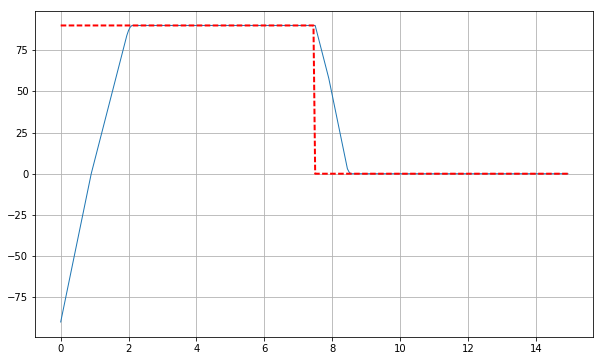

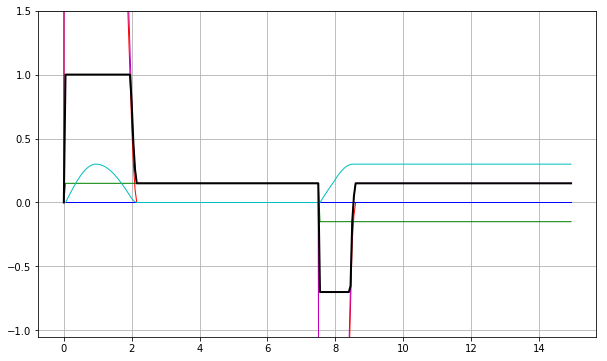

In [6]:
plt.plot(timerange,out,lw=1)
plt.plot(timerange,setpointarray,'r--',lw=2)
plt.grid()
plt.show()
plt.plot(timerange,porpout,'r',lw=1)
plt.plot(timerange,integout,'g',lw=1)
plt.plot(timerange,derivout,'b',lw=1)
plt.plot(timerange,forwout,'c',lw=1)
plt.plot(timerange,pidoutraw,'m',lw=1)
plt.plot(timerange,pidout,'k',lw=2)
plt.ylim(1.5*minout,1.5*maxout)
plt.grid()
plt.show()

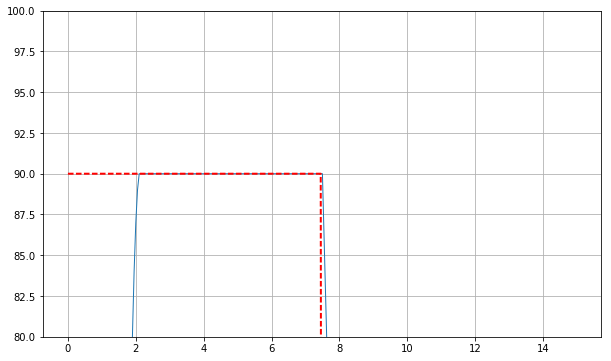

In [7]:
plt.plot(timerange,out,lw=1)
plt.plot(timerange,setpointarray,'r--',lw=2)
plt.ylim(80,100)
plt.grid()

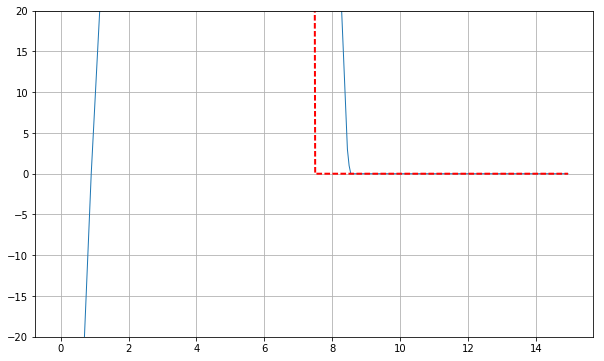

In [8]:
plt.plot(timerange,out,lw=1)
plt.plot(timerange,setpointarray,'r--',lw=2)
plt.ylim(-20,20)
plt.grid()